## Momento de retroalimentación
Yaritzi Itzayana Nicio Nicolás - A01745837

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
file_path = '/content/drive/MyDrive/Momento de retroalimentación: Módulo 2/processed_images'

In [15]:
import os, shutil, pathlib
base_drive_dir = '/content/drive/MyDrive/Momento de retroalimentación: Módulo 2'
new_base_dir = pathlib.Path(base_drive_dir) / "processed_images 2"

In [31]:
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 491 files belonging to 2 classes.
Found 23 files belonging to 2 classes.
Found 121 files belonging to 2 classes.


In [32]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([keras.Input(shape=(180, 180, 3)),
                          layers.Rescaling(1./255),
                          layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=256, kernel_size=3, activation="relu"),
                          layers.MaxPooling2D(pool_size=2),
                          layers.Conv2D(filters=256, kernel_size=3, activation="relu"),
                          layers.Flatten(),
                          layers.Dense(1, activation="sigmoid")])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 41, 41, 128)      

In [33]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=validation_dataset)

Epoch 1/10
16/16 [==============================] - 14s 261ms/step - loss: 0.6903 - accuracy: 0.5112 - val_loss: 0.6298 - val_accuracy: 0.7391
Epoch 2/10
16/16 [==============================] - 12s 404ms/step - loss: 0.5717 - accuracy: 0.7291 - val_loss: 0.5499 - val_accuracy: 0.6957
Epoch 3/10
16/16 [==============================] - 12s 271ms/step - loss: 0.4082 - accuracy: 0.8350 - val_loss: 0.7349 - val_accuracy: 0.7391
Epoch 4/10
16/16 [==============================] - 12s 402ms/step - loss: 0.3398 - accuracy: 0.8534 - val_loss: 1.0938 - val_accuracy: 0.6957
Epoch 5/10
16/16 [==============================] - 15s 398ms/step - loss: 0.2912 - accuracy: 0.8880 - val_loss: 1.0466 - val_accuracy: 0.7391
Epoch 6/10
16/16 [==============================] - 10s 317ms/step - loss: 0.2525 - accuracy: 0.8798 - val_loss: 0.7466 - val_accuracy: 0.8261
Epoch 7/10
16/16 [==============================] - 12s 277ms/step - loss: 0.2533 - accuracy: 0.9022 - val_loss: 1.6874 - val_accuracy: 0.7391

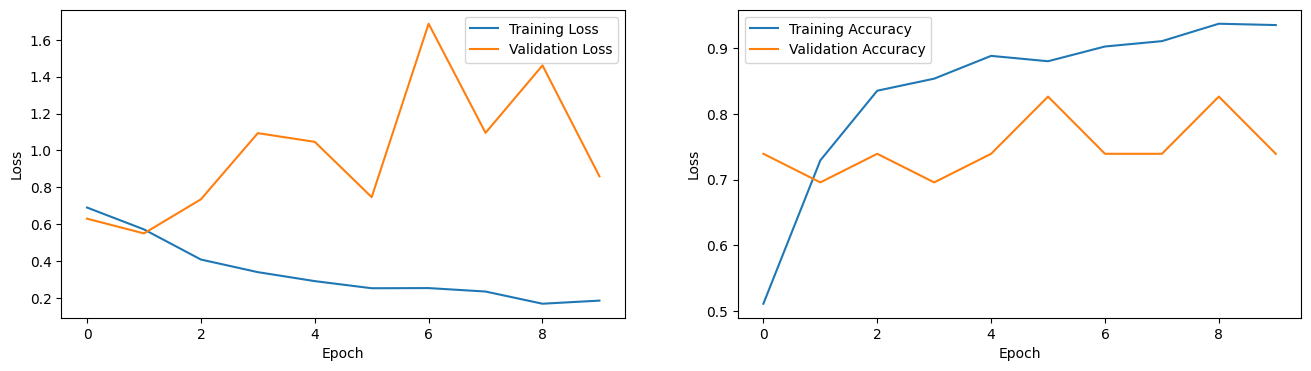

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [36]:
test_model = keras.models.load_model("convnet_from_scratch")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

4/4 [==============================] - 3s 20ms/step - loss: 0.5175 - accuracy: 0.7603
Test accuracy: 0.760
